In [1]:
import numpy as np
import pandas as pd
import math
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [2]:
# get Data from yahoo.
stock_data = web.DataReader('AAPL', data_source='yahoo', start='2014-01-01', end='2020-12-20')
stock_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,20.045713,19.785713,19.791786,20.036428,223084400.0,17.792400
2014-01-02,19.893929,19.715000,19.845715,19.754642,234684800.0,17.542171
2014-01-03,19.775000,19.301071,19.745001,19.320715,392467600.0,17.156841
2014-01-06,19.528570,19.057142,19.194643,19.426071,412610800.0,17.250401
2014-01-07,19.498571,19.211430,19.440001,19.287144,317209200.0,17.127035
...,...,...,...,...,...,...
2020-12-14,123.349998,121.540001,122.599998,121.779999,79184500.0,121.210495
2020-12-15,127.900002,124.129997,124.339996,127.879997,157243700.0,127.281960
2020-12-16,128.369995,126.559998,127.410004,127.809998,98208600.0,127.212296


In [3]:
# Get no. of rows and columns and column names

print(stock_data.shape)
print(stock_data.columns)

(1756, 6)
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


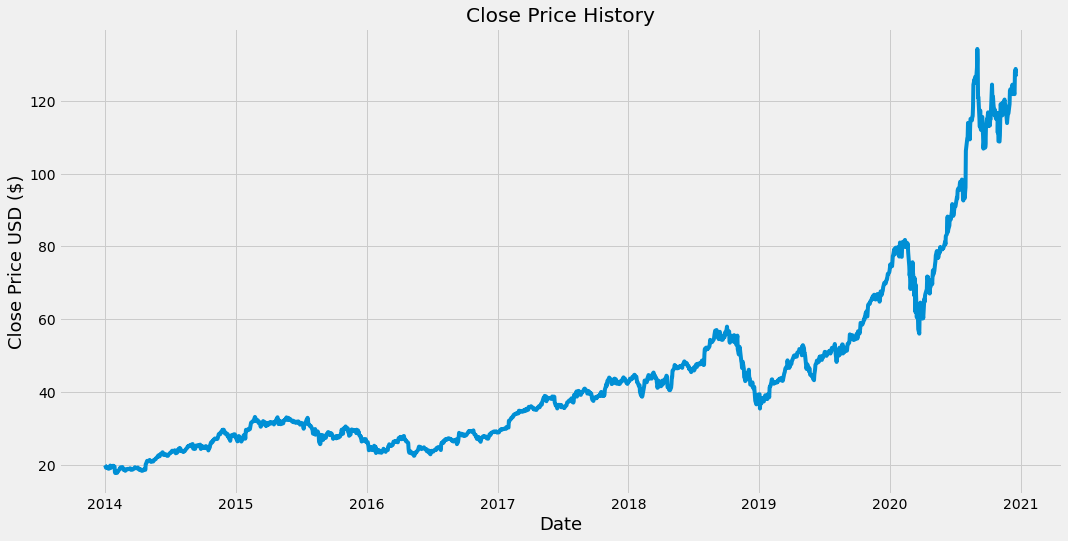

In [6]:
# visualize the closing price history

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(stock_data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [7]:
# create new dataframe with only Close Column
df_close = stock_data.filter(['Close'])

# Convert to numpy array
dataset = df_close.values

# Get the no. of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1405

In [11]:
# Scale the dataset
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01880108],
       [0.0163788 ],
       [0.01264868],
       ...,
       [0.94524236],
       [0.95289296],
       [0.9353568 ]])

In [15]:
# Create the traning dataset
# First create scaled traning dataset 
train_data = scaled_data[0:training_data_len, :]

# split data into the x_train and y_train dataset
x_train = []
y_train = []

for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i,0])
    if i<=101:
        print(x_train)
        print(y_train)
        print()


[array([0.01880108, 0.0163788 , 0.01264868, 0.01355434, 0.01236009,
       0.01341006, 0.01127942, 0.01018034, 0.0110369 , 0.01430959,
       0.01767744, 0.01672265, 0.0125535 , 0.01513237, 0.01588146,
       0.01731517, 0.01421134, 0.01557137, 0.0020631 , 0.0002978 ,
       0.        , 0.00025174, 0.00053726, 0.00276612, 0.00393276,
       0.0039082 , 0.00610943, 0.00896766, 0.01110751, 0.01109522,
       0.01370786, 0.01357275, 0.01418678, 0.01154038, 0.0096308 ,
       0.00781946, 0.00852557, 0.00684011, 0.00539411, 0.00856242,
       0.00812341, 0.00859005, 0.00965842, 0.01000228, 0.00950799,
       0.00941283, 0.0095602 , 0.0111474 , 0.01130705, 0.0094773 ,
       0.00764755, 0.0082769 , 0.00970755, 0.00966457, 0.00887864,
       0.01015884, 0.01209914, 0.01387977, 0.01228026, 0.01156801,
       0.0113838 , 0.01134697, 0.01285437, 0.01313067, 0.01197633,
       0.00983648, 0.00727298, 0.00726378, 0.00937599, 0.00727607,
       0.00608795, 0.00672346, 0.00558138, 0.00590374, 0.0077

In [16]:
# convert the x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
# Reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(1305, 100, 1)


In [27]:
# Bulid the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [28]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
# train the model
model.fit(x_train, y_train , batch_size=1, epochs=2)

Epoch 1/2
1305/1305 [==============================] - 54s 24ms/step - loss: 0.0011
Epoch 2/2
1305/1305 [==============================] - 32s 25ms/step - loss: 1.7329e-04


In [30]:
# create the testing dataset
# First Create new array contaning scaled values from 1305 tot 1756
test_data = scaled_data[training_data_len - 100: , :]

# create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])

In [31]:
# convert data to numpy array
x_test = np.array(x_test)

In [32]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

In [33]:
# Get the model predicated price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [34]:
# get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.343574838306546

<ipython-input-40-d230b1c38da0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


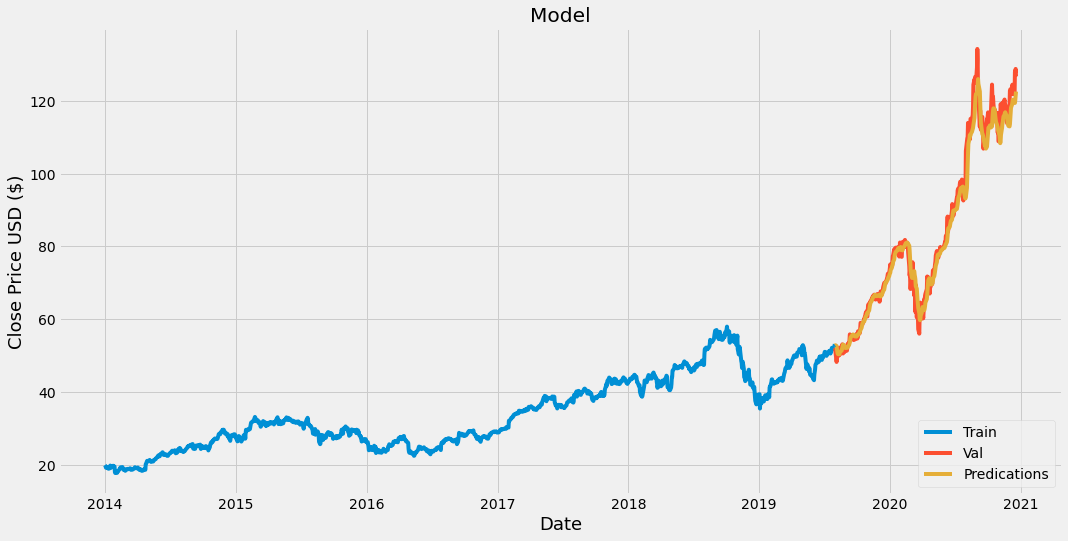

In [40]:
# plot the data
train = df_close[:training_data_len]
valid = df_close[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predications'], loc= 'lower right')
plt.show()

In [41]:
# Show the valid and predicated prices
valid

,Close,Predictions
Date,,
2019-08-01,52.107498,52.853603
2019-08-02,51.005001,52.924183
2019-08-05,48.334999,52.704712
2019-08-06,49.250000,51.913597
2019-08-07,49.759998,51.153366
...,...,...
2020-12-14,121.779999,119.795425
2020-12-15,127.879997,119.373680
2020-12-16,127.809998,120.191559


In [44]:
# Get the Quote
apple_data = web.DataReader('AAPL', data_source='yahoo', start='2014-01-01', end='2020-12-20')
# Create new data frame
new_df = apple_data.filter(['Close'])
# Get the last 100 days closing price values and convert dataframe to array
last_100_days = new_df[-100:].values
#Scale the data to be values between 0 and 1
last_100_days_scaled = scaler.transform(last_100_days)
# create and empty list
X_test = []
#Append the past 100 days
X_test.append(last_100_days_scaled)
# Convert the X_test dataset to np arrays
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1], 1))
# get the Predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

#Print the predicted price
print(pred_price)

[[123.06246]]


In [45]:
# See the actual price
apple_data1 = web.DataReader('AAPL', data_source='yahoo', start='2020-12-21', end='2020-12-21')
print(apple_data1['Close'])

Date
2020-12-21    128.229996
Name: Close, dtype: float64
